<a href="https://colab.research.google.com/github/VijayRameshkumar/TensorFlow_Keras_2.0/blob/master/04.%20CIFAR10_image_classification%20/%202D_CNN_for_cifar10_Dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2D CNN in TensorFlow 2.0 - Build Your First Cifar10 Image Classifier in TensorFlow 2.0 

## What is CNN 

![alt text](https://miro.medium.com/max/2510/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

# Important Terms of CNN 

## Convolutional Layer 

![alt text](https://adeshpande3.github.io/assets/Cover.png)

## Activation Function 

![alt text](https://isaacchanghau.github.io/img/deeplearning/activationfunction/intro.png)

![alt text](https://miro.medium.com/max/1192/1*4ZEDRpFuCIpUjNgjDdT2Lg.png)

## Filter or Kernel Size and  Number of Filters 

![alt text](https://i2.wp.com/i.stack.imgur.com/qmf0m.jpg)

## Stride Size 

## Padding 

<img src = "https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/keras-conv2d/keras_conv2d_padding.gif">

## Max Pooling

![alt text](https://qph.fs.quoracdn.net/main-qimg-98ecf7ba49710bf56042d035a74505b6)

## Flattening and Dense Layer 

In between the convolutional layer and the fully connected layer, there is a 'Flatten' layer. Flattening transforms a two-dimensional matrix of features into a vector that can be fed into a fully connected neural network classifier.

## Download Data and Model Building

In [27]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 4.3MB 49.5MB/s 


In [28]:
!pip install mlxtend==0.17.0

     |████████████████████████████████| 1.3MB 3.4MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

In [30]:
print(tf.__version__)

2.0.0-rc0
2.0.0-rc0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [0]:
from tensorflow.keras.datasets import cifar10

In [33]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
classes_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [35]:
X_train.max()

255

255

In [0]:
X_train = X_train/255
X_test = X_test/255

In [37]:
X_train.shape

(50000, 32, 32, 3)

(50000, 32, 32, 3)

In [38]:
X_test.shape

(10000, 32, 32, 3)

(10000, 32, 32, 3)

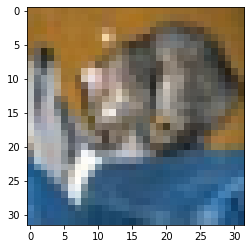

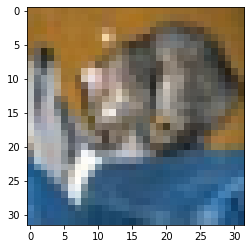

In [39]:
plt.imshow(X_test[0])

In [40]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

## Build CNN Model

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape = [32, 32, 3]))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))




model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [0]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [18]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 218s 4ms/sample - loss: 1.4230 - sparse_categorical_accuracy: 0.4868 - val_loss: 1.1463 - val_sparse_categorical_accuracy: 0.5898
Epoch 2/10
50000/50000 [==============================] - 218s 4ms/sample - loss: 1.0761 - sparse_categorical_accuracy: 0.6194 - val_loss: 1.0546 - val_sparse_categorical_accuracy: 0.6301
Epoch 3/10
50000/50000 [==============================] - 219s 4ms/sample - loss: 0.9463 - sparse_categorical_accuracy: 0.6637 - val_loss: 0.9137 - val_sparse_categorical_accuracy: 0.6791
Epoch 4/10
50000/50000 [==============================] - 219s 4ms/sample - loss: 0.8483 - sparse_categorical_accuracy: 0.7018 - val_loss: 0.9232 - val_sparse_categorical_accuracy: 0.6775
Epoch 5/10
50000/50000 [==============================] - 219s 4ms/sample - loss: 0.7822 - sparse_categorical_accuracy: 0.7240 - val_loss: 0.9273 - val_sparse_categorical_accuracy: 0.6747
Epoch 6/10

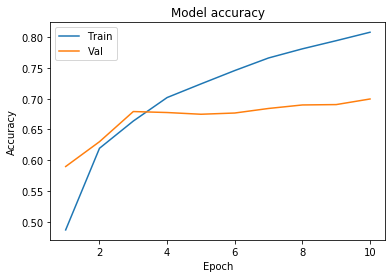

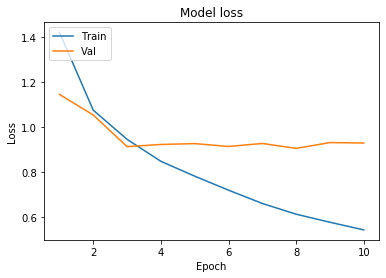

In [19]:
# Plot training & validation accuracy values
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [0]:
y_pred = model.predict_classes(X_test)

In [22]:
y_pred

array([3, 8, 8, ..., 6, 4, 7])

In [23]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [0]:
mat = confusion_matrix(y_test, y_pred)

In [25]:
mat

array([[717,  19,  53,  23,  22,   6,  26,  14,  78,  42],
       [ 15, 800,  12,  12,   6,   5,  13,   4,  29, 104],
       [ 61,   1, 532,  53, 118,  86,  97,  35,  15,   2],
       [ 24,  10,  53, 452,  98, 216,  86,  36,  14,  11],
       [ 18,   3,  55,  45, 695,  45,  73,  57,   7,   2],
       [  9,   2,  44, 154,  58, 630,  40,  53,   6,   4],
       [  3,   2,  28,  34,  60,  41, 825,   5,   2,   0],
       [  9,   0,  37,  36,  77,  64,  17, 742,   6,  12],
       [ 48,  39,  14,  16,   7,  11,  14,   3, 813,  35],
       [ 27,  75,   2,  21,  13,   4,   8,  32,  29, 789]])

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fafa9c8d0f0>)

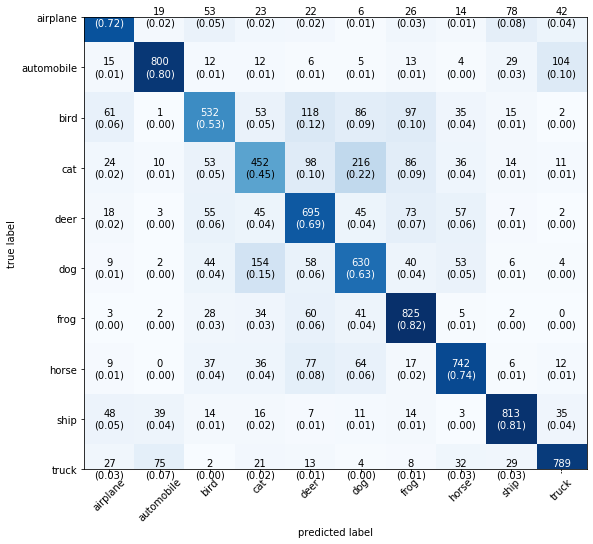

In [26]:
plot_confusion_matrix(mat,figsize=(9,9), class_names=classes_name, show_normed=True)